# Laboratório de Processamento de Sinais para Comunicações
##  Prárica 01 - Amostragem

### Aluno - Matrícula:

Ezequias Márcio Silva de Santana Júnior - 371887

In [1]:
# Importando os módulos necessários para a execução do código.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


In [2]:
# Funções implementadas para a recureção:
def rec_zero_order(sampled, time):
    """
    Função que implementa a interpolação de ordem zero, utilizando um filtro de interpolação
    retangular.
    """
    def rect(x):
        """
        Função da resposta ao impulso do filtro retangular.
        """
        if abs(x) > 0.5:
            return 0
        elif abs(x) < 0.5:
            return 1
        else:
            return 0.5
    
    # Período de amostragem:
    Ts = 1/(sampled.size - 1)
    
    # Variável que recebe o sinal recuperado:
    zero_order = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*sampled[n]
        zero_order[t] = soma
    
    return zero_order


def rec_linear_interp(sampled, time):
    """
    Função que implementa recuperação do sinal via interpolação linear 1D.
    """
    
#     rec_lin = np.zeros(sr)
#     for t in range(sr):
#         for i in range(len(sampled)-1):
#             if time[t] > ts[i] and time[t] < ts[i+1]:
#                 rec_lin[t] = sampled[i] + (time[t] - ts[i])*\
#                          (sampled[i+1] - sampled[i])/(ts[i+1] - ts[i])
    
    ts = np.linspace(min(time), max(time), sampled.size)
    
    return np.interp(time, ts, sampled) # return rec_lin


def rec_ideal_interp(sampled, time):
    """
    Função que implementa a interpolação ideal, utilizando um filtro de interpolação
    sinc.
    """
    # Período de amostragem:
    Ts = 1/(sampled.size - 1)
    
    # Variável que recebe o sinal recuperado:
    ideal = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += np.sinc((time[t]  - n*Ts)/Ts)*sampled[n]
        ideal[t] = soma
    
    return ideal


### Plotando sinal:

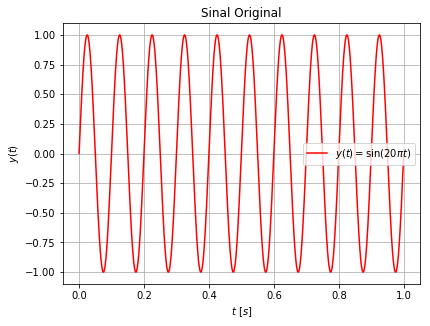

In [3]:
# Definindo sample rate global em 3.2k amostras em 1 segundo, simulando sinal o contínuo:
sr = 3200 # 3.2kHz

# Valores de t in [0, 1] segundos:
time = np.linspace(0, 1, sr)

# Construção do sinal:
freq = 10 # Hz
signal = np.sin(2*np.pi*freq*time)

# Plotando a curva:
dim = 1*6.4                                          # Dimensões da figura (múltiplos de 6.4)
plt.figure('analog_signal', figsize=[dim, 0.75*dim]) # Inicializando figura
plt.title('Sinal Original')                          #
plt.xlabel('$t$ [$s$]')                              # Título, eixos
plt.ylabel('$y(t)$')                                 #
plt.plot(time, signal, 'r', label='$y(t) = \sin(20\pi t)$') # plot
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Amostragem:

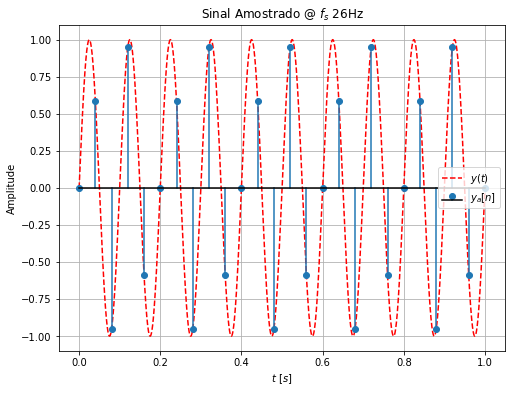

In [4]:
# Definindo frequência de amostragem:                      Nyquist: 62.83185307179586 (2*pi*10)
sample_freq = 26 #Hz

# Instantes de tempo em que o sinal é amostrado:
ts = np.linspace(0, 1, sample_freq)

# Amostras do sinal
samp_signal = np.sin(2*np.pi*freq*ts)

# Plotagem do sinal amostrado e original
dim = 1.25*6.4 
plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
plt.xlabel('$t$ [$s$]')
plt.ylabel('Amplitude') 
plt.plot(time, signal, 'r--', label='$y(t)$')
plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-', label='$y_a[n]$')
plt.stem
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Recuperação:

In [5]:
# Recuperando o sinal:
signal_zero_ord = rec_zero_order(samp_signal, time)
signal_linear = rec_linear_interp(samp_signal, time)
signal_ideal = rec_ideal_interp(samp_signal, time)

# Cálculo e armazenamento do MSE em um vetor:
erro = np.zeros((3, sr))
erro[0] = signal - signal_zero_ord
erro[1] = signal - signal_linear
erro[2] = signal - signal_ideal

mse = np.array([np.mean(erro[i,:]**2) for i in range(3)])
print(mse)

[0.76606307 0.12567119 0.00573582]


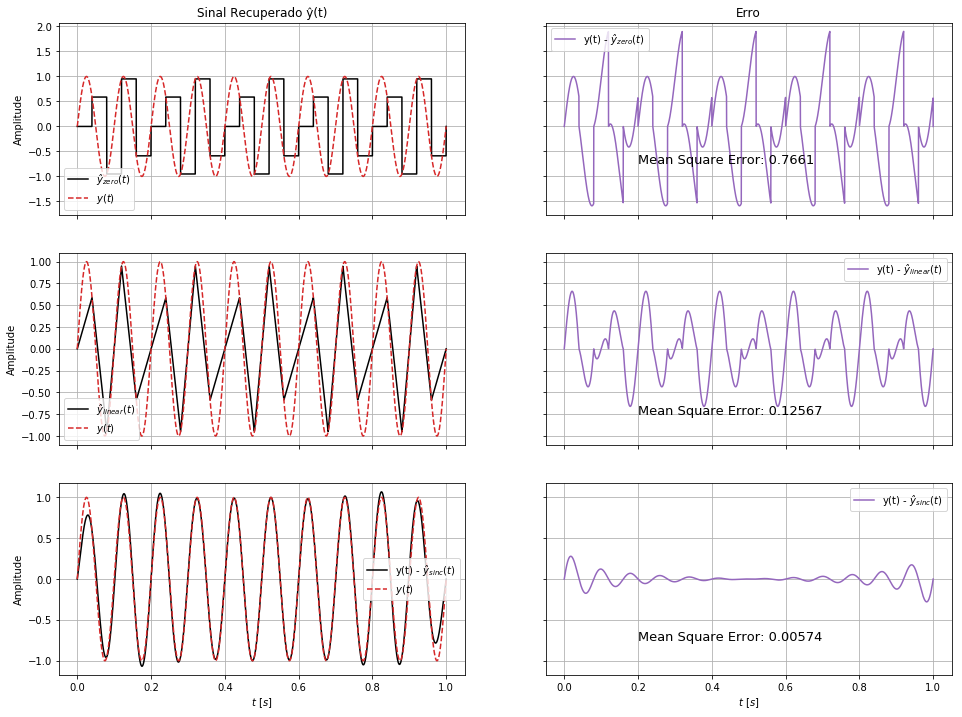

In [6]:
# Mostrando resultados:
dim = 2.5*6.4 
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', num='results', figsize=[dim, 0.75*dim])

# Parâmetros do texto:
style = dict(size=13, color='black')

# Plots:
ax[0, 0].plot(time, signal_zero_ord, 'k-', label='$ŷ_{zero}(t)$')
ax[0, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[0, 0].grid()

ax[0, 1].plot(time, erro[0], 'C4-', label='y(t) - $ŷ_{zero}(t)$')
ax[0, 1].text(0.2, -0.75, 'Mean Square Error: {:.4f}'.format(mse[0]), **style)
ax[0, 1].grid()

ax[1, 0].plot(time, signal_linear, 'k-', label='$ŷ_{linear}(t)$')
ax[1, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[1, 0].grid()

ax[1, 1].plot(time, erro[1], 'C4-', label='y(t) - $ŷ_{linear}(t)$')
ax[1, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[1]), **style)
ax[1, 1].grid()

ax[2, 0].plot(time, signal_ideal, 'k-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[2, 0].grid()

ax[2, 1].plot(time, erro[2], 'C4-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[2]), **style)
ax[2, 1].grid()

# Textos e legendas:
ax[0, 0].set_title('Sinal Recuperado ŷ(t)')
ax[0, 1].set_title('Erro')

for i in range(3):
    ax[i, 0].set_ylabel('Amplitude')

ax[2, 0].set_xlabel('$t$ [$s$]')
ax[2, 1].set_xlabel('$t$ [$s$]')

ax[0, 0].legend(loc='lower left')
ax[1, 0].legend(loc='lower left')
ax[2, 0].legend(loc='best')
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()

plt.show('resuls')


In [7]:
whos

Variable            Type        Data/Info
-----------------------------------------
ax                  ndarray     3x2: 6 elems, type `object`, 48 bytes
dim                 float       16.0
display             function    <function display at 0x7ff6afce1598>
erro                ndarray     3x3200: 9600 elems, type `float64`, 76800 bytes
fig                 Figure      Figure(1152x864)
freq                int         10
i                   int         2
mse                 ndarray     3: 3 elems, type `float64`, 24 bytes
np                  module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                 module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rec_ideal_interp    function    <function rec_ideal_interp at 0x7ff69e78ec80>
rec_linear_interp   function    <function rec_linear_interp at 0x7ff684064510>
rec_zero_order      function    <function rec_zero_order at 0x7ff684064620>
samp_signal         ndarray     26: 26 elems, type `float64`, 20